<a href="https://colab.research.google.com/github/valogonor/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
# The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook.
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.datasets import boston_housing

(x_train, y_train),(x_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


In [0]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

input_shape = 13

x_train shape: (404, 13)
y_train shape: (404,)
x_test shape: (102, 13)
y_test shape: (102,)


In [0]:
# Normalize the data (all features should have roughly the same scale)
x_train = keras.utils.normalize(x_train, axis=-1, order=2)
x_test = keras.utils.normalize(x_test, axis=-1, order=2)

-    Import the type of model and layers that you will need from Keras.
-    Instantiate a model object and use model.add() to add layers to your model
-    Since this is a regression model you will have a single output node in the final layer.
-    Use activation functions that are appropriate for this task
-    Compile your model

In [0]:
# I'll use 13 lucky neurons for each of two hidden layers
model = Sequential()
model.add(Dense(13, activation='relu', input_shape=(13,)))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 14        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


-    Fit your model and report its accuracy in terms of Mean Squared Error
-    Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.

In [0]:
epochs = 1000
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 323 samples, validate on 81 samples
Epoch 1/1000
323/323 [==============================] - 0s 563us/step - loss: 566.8385 - mean_squared_error: 566.8385 - val_loss: 635.1121 - val_mean_squared_error: 635.1121
Epoch 2/1000
323/323 [==============================] - 0s 48us/step - loss: 561.6010 - mean_squared_error: 561.6010 - val_loss: 628.7858 - val_mean_squared_error: 628.7858
Epoch 3/1000
323/323 [==============================] - 0s 43us/step - loss: 555.2057 - mean_squared_error: 555.2057 - val_loss: 621.4042 - val_mean_squared_error: 621.4042
Epoch 4/1000
323/323 [==============================] - 0s 50us/step - loss: 548.0865 - mean_squared_error: 548.0865 - val_loss: 613.3265 - val_mean_squared_error: 613.3265
Epoch 5/1000
323/323 [==============================] - 0s 53us/step - loss: 540.2446 - mean_squared_error: 540.2446 - val_loss: 604.2030 - val_mean_squared_error: 604.2030
Epoch 6/1000
323/323 [===================

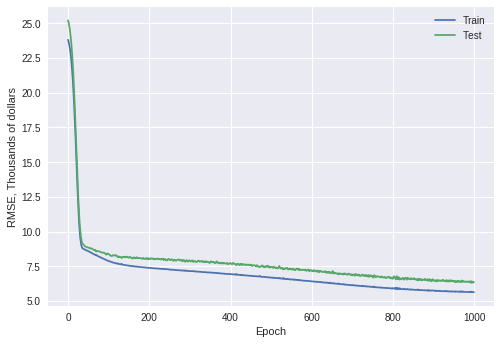

In [0]:
RMSE_train = np.sqrt(history.history['mean_squared_error'])
RMSE_test = np.sqrt(history.history['val_mean_squared_error'])
fig, ax = plt.subplots()
ax.plot(RMSE_train, label = 'Train')
ax.plot(RMSE_test, label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE, Thousands of dollars')
plt.legend()
plt.show()

In [0]:
y_pred = model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE from NN: {RMSE:.3f}')

RMSE from NN: 5.842


- Run this same data through a linear regression model. Which achieves higher accuracy?

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = linreg.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE from Linear Regression: {RMSE:.3f}')

RMSE from Linear Regression: 4.262


- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
# I'll add polynomial features. 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

x_train.shape, x_test.shape

((404, 105), (102, 105))

In [0]:
# I'll use 13 lucky neurons for each of two hidden layers
model = Sequential()
model.add(Dense(13, activation='relu', input_shape=(105,)))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13)                1378      
_________________________________________________________________
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 14        
Total params: 1,574
Trainable params: 1,574
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 1000
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)

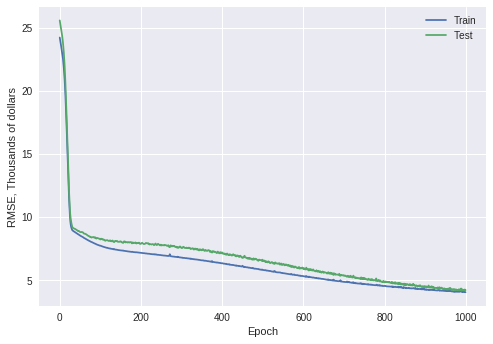

In [0]:
RMSE_train = np.sqrt(history.history['mean_squared_error'])
RMSE_test = np.sqrt(history.history['val_mean_squared_error'])
fig, ax = plt.subplots()
ax.plot(RMSE_train, label = 'Train')
ax.plot(RMSE_test, label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE, Thousands of dollars')
plt.legend()
plt.show()

In [0]:
y_pred = model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE from NN: {RMSE:.3f}')

RMSE from NN: 5.102


And now Linear Regression again

In [0]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE from Linear Regression: {RMSE:.3f}')

RMSE from Linear Regression: 3.695


Adding polynomial features improved linear regression even more significantly than it did the neural network model.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape each image into a single line of floats between 0 and 1
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

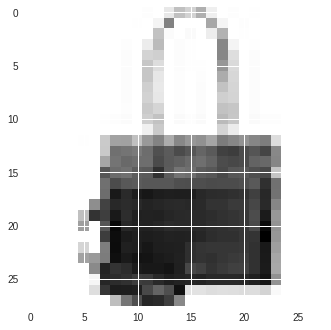

In [0]:
# Sample image!
plt.imshow(x_train[333].reshape(28,28), cmap='Greys');

- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

This time around, I'll build cross-validation into the model early-on. This will require a keras wrapper that works with the sklearn API. The first step is to write a function that creates a keras model.

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [0]:
np.random.seed(42)

# Two inner layers of 28 each, 
def NN1():
    model = Sequential()
    model.add(Dense(28, activation='relu', input_dim=784))
    model.add(Dense(28, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
model = NN1()
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 1s - loss: 0.7986 - acc: 0.7375 - val_loss: 0.5211 - val_acc: 0.8185
Epoch 2/50
 - 1s - loss: 0.4590 - acc: 0.8413 - val_loss: 0.4978 - val_acc: 0.8243
Epoch 3/50
 - 1s - loss: 0.4189 - acc: 0.8518 - val_loss: 0.4330 - val_acc: 0.8523
Epoch 4/50
 - 1s - loss: 0.3922 - acc: 0.8627 - val_loss: 0.4234 - val_acc: 0.8530
Epoch 5/50
 - 1s - loss: 0.3766 - acc: 0.8668 - val_loss: 0.4124 - val_acc: 0.8549
Epoch 6/50
 - 1s - loss: 0.3701 - acc: 0.8678 - val_loss: 0.4011 - val_acc: 0.8587
Epoch 7/50
 - 1s - loss: 0.3574 - acc: 0.8719 - val_loss: 0.3972 - val_acc: 0.8607
Epoch 8/50
 - 1s - loss: 0.3462 - acc: 0.8770 - val_loss: 0.4037 - val_acc: 0.8548
Epoch 9/50
 - 1s - loss: 0.3405 - acc: 0.8789 - val_loss: 0.3985 - val_acc: 0.8578
Epoch 10/50
 - 1s - loss: 0.3347 - acc: 0.8798 - val_loss: 0.3847 - val_acc: 0.8643
Epoch 11/50
 - 1s - loss: 0.3284 - acc: 0.8818 - val_loss: 0.3835 - val_acc: 0.8629
Epoch 12/50
 - 1s - loss: 0.3238 - 

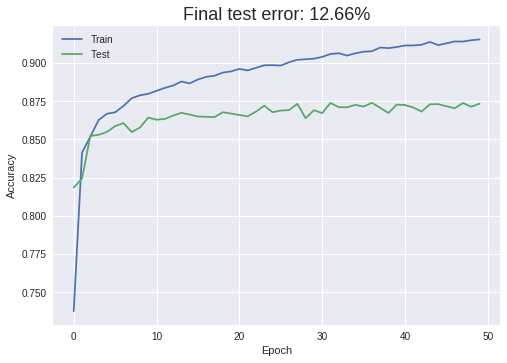

In [0]:
scores = model.evaluate(x_test, y_test, verbose=0)
fig, ax = plt.subplots()
ax.plot(history.history['acc'], label = 'Train')
ax.plot(history.history['val_acc'], label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.title(f'Final test error: {100-scores[1]*100:.2f}%', fontsize=18)
plt.legend()
plt.show()

Let's try a model with dropout layers

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


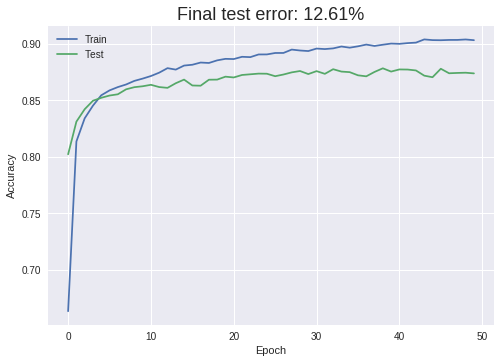

In [0]:
def NN2():
    model = Sequential()
    model.add(Dense(28, activation='relu', input_dim=784))
    model.add(Dropout(0.05))
    model.add(Dense(28, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = NN2()
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50, batch_size=200, verbose=0)

scores = model.evaluate(x_test, y_test, verbose=0)
fig, ax = plt.subplots()
ax.plot(history.history['acc'], label = 'Train')
ax.plot(history.history['val_acc'], label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.title(f'Final test error: {100-scores[1]*100:.2f}%', fontsize=18)
plt.legend()
plt.show()

And another with an extra hidden layer

In [0]:
def NN2():
    model = Sequential()
    model.add(Dense(28, activation='relu', input_dim=784))
    model.add(Dropout(0.05))
    model.add(Dense(28, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(28, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = NN2()
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=30, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.9191 - acc: 0.6674 - val_loss: 0.5566 - val_acc: 0.8110
Epoch 2/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.5516 - acc: 0.8049 - val_loss: 0.4635 - val_acc: 0.8345
Epoch 3/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.4789 - acc: 0.8294 - val_loss: 0.4326 - val_acc: 0.8410
Epoch 4/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.4424 - acc: 0.8425 - val_loss: 0.4094 - val_acc: 0.8527
Epoch 5/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.4141 - acc: 0.8507 - val_loss: 0.4105 - val_acc: 0.8483
Epoch 6/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.4051 - acc: 0.8539 - val_loss: 0.3931 - val_acc: 0.8590
Epoch 7/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.3886 - acc: 0.8590 - val_loss: 0.3928 - val_acc

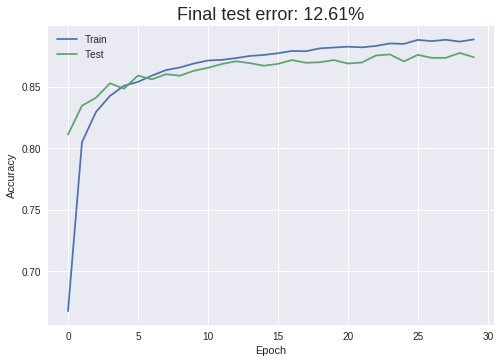

In [0]:
scores = model.evaluate(x_test, y_test, verbose=0)
fig, ax = plt.subplots()
ax.plot(history.history['acc'], label = 'Train')
ax.plot(history.history['val_acc'], label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.title(f'Final test error: {100-scores[1]*100:.2f}%', fontsize=18)
plt.legend()
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.